## "Localization"

- Study 1D chain of masses and springs.
- Turn high-dimensional ODE problem into linear algebra problem - there could be some time spent on the physics, or we could just cut to the result.
- Motion is conveniently described in terms of "modes" - these are the eigenvectors of this matrix.
- Find eigenstuff.
- Compare with analytic solutions.
- Study the consequences of introducing a defect.
- Study similar problem in different configurations like 2D square and honeycomb.

Stuff to put in maybe:
- general discussion of eigenstuff and decomposition. some review of basic idea from LA. 
- defect mass instead of defect spring?
- can also study case of alternating springs k, k' - histogram of eigenvalues (two clumps)
- band gap
- 2D square lattice -> van Hove singularity and magnetism
- 2D honeycomb -> Dirac fermions
- numeric issues - high dimensional eigen problems. numerical instability. condition number.

Fun stuff:
- animation of masses on springs # I think this should be a separate notebook that focuses on just the visual / interactive.
    - could start with some IC and then watch the motion as well as mode decomposition
    - could control by pumping certain modes to see the collective effect

Resources:
- Solutions to Scalettar 104b http://scalettar.physics.ucdavis.edu/p104b/assignment5_2010solns.pdf

TODO : Think about eigenvalue problem for large matrices. What can we do here to improve size and speed? Is this necessary for us? Can look at scipy.linalg. Check which libraries are linked: OpenBLAS, LAPACK... Explore using sparse arrays in scipy.

In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

### 1D system of masses on springs
1D chain of j=1,2,...N identical masses connected by identical springs k.

2k   -k   0   0   [...]  0   -k
-k2k-k 0 0-k2k 0 [...]
0 0 0 0
-k 0 0 0
[...]  0    0
[...]  0    0
[...]2k -k [...]-k 2k

In [3]:
# How to construct this matrix?
N = 20 # Number of masses
k = 1.3 # Spring constant
mass = 1.0 # We don't really use the mass here.

m = np.zeros((N, N))

for ind in range(N):
    for jnd in range(N):
        # Set diagonal
        if ind == jnd:
            m[ind, jnd] = 2*k
        # Set off-diagonals.
        elif ind == (jnd + 1)%N:
            m[ind, jnd] = -k
        elif ind == (jnd -1)%N:
            m[ind, jnd] = -k
        else:
            pass
        
#print(m)

### Find eigenstuff.

Could review different kinds of matrices: Hermitian, symmetric, normal, .. and some properties and roles in physics.

Could possibly dive into how different algorithms work for different types of matrices and some big O or stability issues.
Maybe we can do that later with large N just heuristically.

In [4]:
w, v = LA.eig(m)
wh, vh = LA.eigh(m) # H is for Hermitian
#print("eigenvalues\n{}".format(w))
#print("eigenvectors\n{}".format(v))

print(v[:,2])
print(v[2,2].dtype)

[-0.31622777  0.25583364 -0.09771975 -0.09771975  0.25583364 -0.31622777
  0.25583364 -0.09771975 -0.09771975  0.25583364 -0.31622777  0.25583364
 -0.09771975 -0.09771975  0.25583364 -0.31622777  0.25583364 -0.09771975
 -0.09771975  0.25583364]
float64


### Demonstrate, by computing, that you understand what these eigenvectors and eigenvalues mean.
Use np.dot()
This function is used for (vector, vector) dot products and well as (matrix, vector) and others.

In [5]:
# ANSWER
print(np.dot(m, v[:, 2]) / w[2])
print(v[:, 2])

[-0.31622777  0.25583364 -0.09771975 -0.09771975  0.25583364 -0.31622777
  0.25583364 -0.09771975 -0.09771975  0.25583364 -0.31622777  0.25583364
 -0.09771975 -0.09771975  0.25583364 -0.31622777  0.25583364 -0.09771975
 -0.09771975  0.25583364]
[-0.31622777  0.25583364 -0.09771975 -0.09771975  0.25583364 -0.31622777
  0.25583364 -0.09771975 -0.09771975  0.25583364 -0.31622777  0.25583364
 -0.09771975 -0.09771975  0.25583364 -0.31622777  0.25583364 -0.09771975
 -0.09771975  0.25583364]


In [6]:
# TRY: Are the eigenvectors normalized? Check.

# ANSWER
for ind in range(len(w)):
    print(np.sum(v[:, ind]**2)**0.5)

print(LA.norm(v, axis=0)) # A library function for doing the same thing - maybe better.

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
# TRY: Are the elements supposed to be real? Are they real? What is the datatype?

# ANSWER
print(complex(v[1,2]).imag)
print(type(v[1,2]))

0.0
<class 'numpy.float64'>


In [8]:
# Two different solvers. eig and eigh - latter is for Hermition (includes real symmetric).
# Do they yield the same results?

In [9]:
# Look at order of eigenvalues.
print(w)
print(wh)

[ 5.20000000e+00  5.07274694e+00  4.70344419e+00  4.12824166e+00
  3.40344419e+00  2.60000000e+00  1.79655581e+00  1.07175834e+00
 -9.75571953e-16  1.27253058e-01  4.96555815e-01  5.07274694e+00
  4.70344419e+00  4.12824166e+00  3.40344419e+00  2.60000000e+00
  1.27253058e-01  4.96555815e-01  1.07175834e+00  1.79655581e+00]
[-2.38813194e-16  1.27253058e-01  1.27253058e-01  4.96555815e-01
  4.96555815e-01  1.07175834e+00  1.07175834e+00  1.79655581e+00
  1.79655581e+00  2.60000000e+00  2.60000000e+00  3.40344419e+00
  3.40344419e+00  4.12824166e+00  4.12824166e+00  4.70344419e+00
  4.70344419e+00  5.07274694e+00  5.07274694e+00  5.20000000e+00]


In [10]:
# Sort eigenstuff using eigenvalues.
inds = w.argsort()
w = w[inds]
v = v[:, inds]

# Compare orders again.
print(w)
print(wh)

[-9.75571953e-16  1.27253058e-01  1.27253058e-01  4.96555815e-01
  4.96555815e-01  1.07175834e+00  1.07175834e+00  1.79655581e+00
  1.79655581e+00  2.60000000e+00  2.60000000e+00  3.40344419e+00
  3.40344419e+00  4.12824166e+00  4.12824166e+00  4.70344419e+00
  4.70344419e+00  5.07274694e+00  5.07274694e+00  5.20000000e+00]
[-2.38813194e-16  1.27253058e-01  1.27253058e-01  4.96555815e-01
  4.96555815e-01  1.07175834e+00  1.07175834e+00  1.79655581e+00
  1.79655581e+00  2.60000000e+00  2.60000000e+00  3.40344419e+00
  3.40344419e+00  4.12824166e+00  4.12824166e+00  4.70344419e+00
  4.70344419e+00  5.07274694e+00  5.07274694e+00  5.20000000e+00]


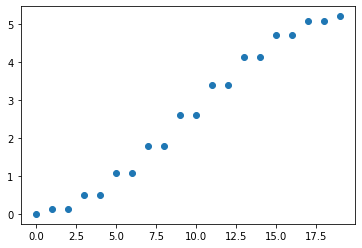

In [11]:
plt.plot(range(N), wh, 'o')
# plt.bar(range(N), wh)

Eigenvalues are actually known analytically

$m \omega^2 = 2k ( 1 - \cos(q_n) )$

where:

$q_n = 2 \pi n/N$ and 
$n = 1,2,3 \ldots N$

$m \omega^2$ is the eigenvalue

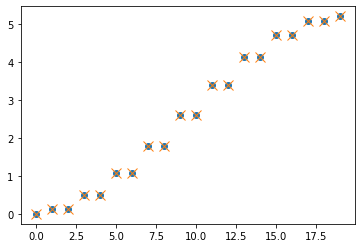

In [12]:
ns = np.arange(1, N+1)
qs = 2 * np.pi * ns / N
theory_evals = 2 * k * (1 - np.cos(qs))

fig = plt.figure()
plt.plot(range(N), wh, 'o')
plt.plot(range(N), np.sort(theory_evals), 'x', markersize=10)

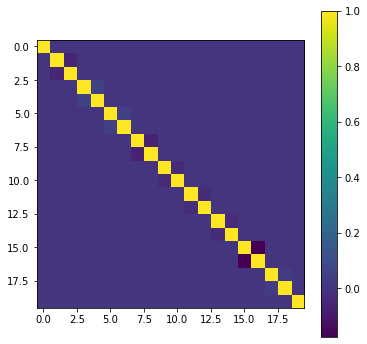

In [18]:
# Check orthogonality of eigenvectors.
# Compare the results of the two algorithms.

# CHALLENGE: Come up with a different colormap where the we illustrate that the diagonal values are 1, butthese values don't "clobber" the distinctions between the small values.
inner_products = np.zeros((N, N))

# Modify to include results from eigh()
for ind in range(N):
    for jnd in range(N):
        inner_products[ind, jnd] = np.dot(v[:, ind], v[:, jnd])
#         inner_products[ind, jnd] = np.dot(vh[:, ind], vh[:, jnd])

# np.fill_diagonal(inner_products, 0) # TRY: What happens when we add this line?

fig = plt.figure(figsize=(6,6))
plt.imshow(inner_products)
plt.colorbar()

# print(inner_products)
# print(np.around(inner_products+0.00001, 3))

### Eigenvectors are all ‘extended’. 
Visualize by plotting squares of components vs mass number j.

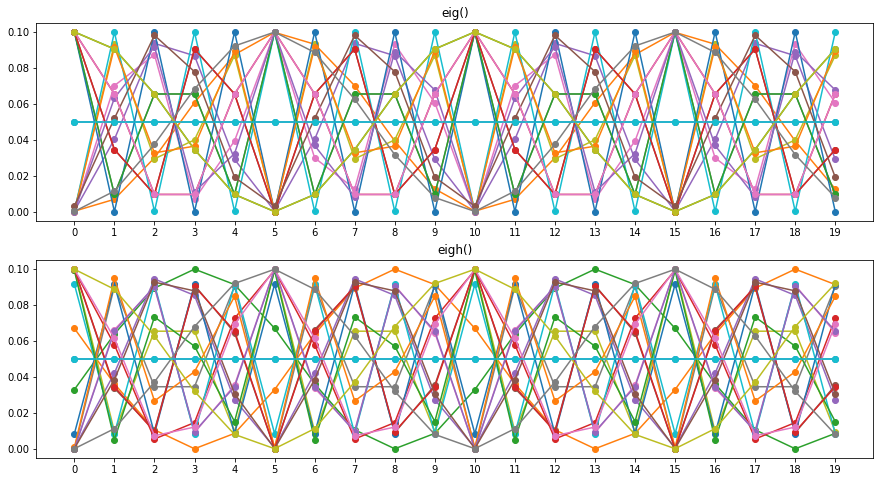

In [19]:
# Looks like the results are different..
# TRY: Plot squares (of each element) to see if it is an issue with signs.

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15, 8))
for ind in range(N):
# for ind in [8,9,10]:
    ax[0].plot(v[:, ind]**2, 'o-')
    ax[1].plot(vh[:, ind]**2, 'o-')
    ax[0].set_xticks(range(N))
    ax[1].set_xticks(range(N))
    ax[0].set_title('eig()')
    ax[1].set_title('eigh()')

In [20]:
# Theoretical result for eigenvectors

# TODO: fix issue wrt zero-indexing
# TODO: use linear combination to yield real eigenvectors

js = np.arange(0, N)

# theory_evecs = 
tv = np.zeros((N, N), dtype=complex)

for jnd in js:
    tv[:, jnd] = np.exp(1j * qs * jnd)
    
print(tv)
# v(q_n,j) = exp(i q_n j) / sqrt(N)

[[ 1.00000000e+00+0.00000000e+00j  9.51056516e-01+3.09016994e-01j
   8.09016994e-01+5.87785252e-01j  5.87785252e-01+8.09016994e-01j
   3.09016994e-01+9.51056516e-01j  6.12323400e-17+1.00000000e+00j
  -3.09016994e-01+9.51056516e-01j -5.87785252e-01+8.09016994e-01j
  -8.09016994e-01+5.87785252e-01j -9.51056516e-01+3.09016994e-01j
  -1.00000000e+00+1.22464680e-16j -9.51056516e-01-3.09016994e-01j
  -8.09016994e-01-5.87785252e-01j -5.87785252e-01-8.09016994e-01j
  -3.09016994e-01-9.51056516e-01j -1.83697020e-16-1.00000000e+00j
   3.09016994e-01-9.51056516e-01j  5.87785252e-01-8.09016994e-01j
   8.09016994e-01-5.87785252e-01j  9.51056516e-01-3.09016994e-01j]
 [ 1.00000000e+00+0.00000000e+00j  8.09016994e-01+5.87785252e-01j
   3.09016994e-01+9.51056516e-01j -3.09016994e-01+9.51056516e-01j
  -8.09016994e-01+5.87785252e-01j -1.00000000e+00+1.22464680e-16j
  -8.09016994e-01-5.87785252e-01j -3.09016994e-01-9.51056516e-01j
   3.09016994e-01-9.51056516e-01j  8.09016994e-01-5.87785252e-01j
   1.0000

### TRY: How might we define / describe an "extended" eigenvector?
First, show the variance of each eigenvector.
What kind of "not really that extended" eigenvector might the variance miss?
Propose another measure to more intuitively capture this idea of not/extended.

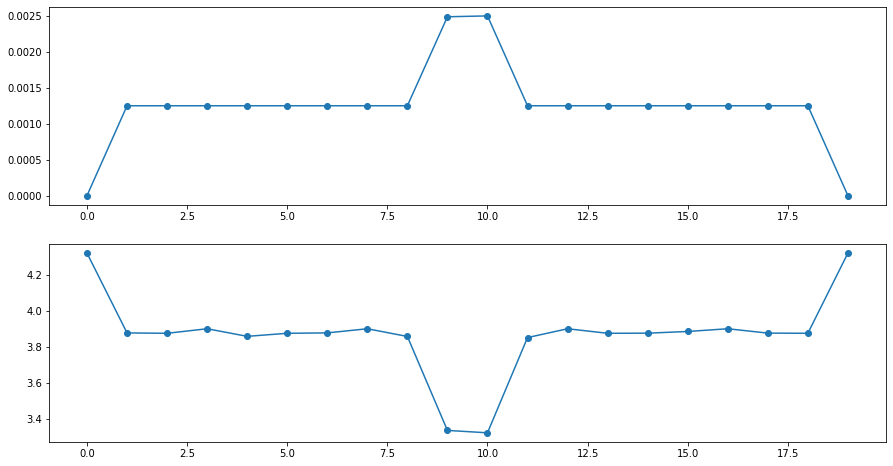

In [21]:
# ANSWER : one possible answer

from scipy.stats import entropy

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15, 8))
ax[0].plot([np.var(v[:, ind]**2) for ind in range(N)], 'o-')
ax[1].plot([entropy(abs(v[:, ind])**2, base=2) for ind in range(N)], 'o-')

### Degenerate eigenvalues correspond to an eigenspace of dimension > 1.
This means that different sets of spanning eigenvectors may be reported.
According to the eigenvalues we find for eig() and eigh(), we see that there are (N-1)/2 2D eigenspaces.
Determine if the spans reported are the same.

In [24]:
# CHALLENGE: TODO make this a challenge at the end
# Try to solve by hand - adjust "a" and "b".
# Is there some combination of vectors in the 2dimensional vh eigenspace that gives the eigenvector from v?
a = 0.8
b = 1.2

print("Can we show that one vector is in the span of two others?")
print(a * vh[:,1] + b * vh[:,2])
print(v[:,1])

Can we show that one vector is in the span of two others?
[-0.01077084 -0.1511378  -0.27671034 -0.37519655 -0.4369559  -0.45594297
 -0.43029916 -0.36253467 -0.25928276 -0.13065045  0.01077084  0.1511378
  0.27671034  0.37519655  0.4369559   0.45594297  0.43029916  0.36253467
  0.25928276  0.13065045]
[ 0.01557846 -0.08278511 -0.1730451  -0.24636622 -0.2955713  -0.31584381
 -0.30519932 -0.2646798  -0.19825157 -0.1124171  -0.01557846  0.08278511
  0.1730451   0.24636622  0.2955713   0.31584381  0.30519932  0.2646798
  0.19825157  0.1124171 ]


In [25]:
# Look at the eigenvectors and recall that eigenvector degeneracy corresponds to a higher-dimensional eigenspace.
print(w)
print(wh)

[-9.75571953e-16  1.27253058e-01  1.27253058e-01  4.96555815e-01
  4.96555815e-01  1.07175834e+00  1.07175834e+00  1.79655581e+00
  1.79655581e+00  2.60000000e+00  2.60000000e+00  3.40344419e+00
  3.40344419e+00  4.12824166e+00  4.12824166e+00  4.70344419e+00
  4.70344419e+00  5.07274694e+00  5.07274694e+00  5.20000000e+00]
[-2.38813194e-16  1.27253058e-01  1.27253058e-01  4.96555815e-01
  4.96555815e-01  1.07175834e+00  1.07175834e+00  1.79655581e+00
  1.79655581e+00  2.60000000e+00  2.60000000e+00  3.40344419e+00
  3.40344419e+00  4.12824166e+00  4.12824166e+00  4.70344419e+00
  4.70344419e+00  5.07274694e+00  5.07274694e+00  5.20000000e+00]


In [26]:
# We can solve this problem with Singular Value Decomposition (SVD).

augmented = np.column_stack([vh[:,1], vh[:,2], v[:,1]])
print(augmented)

U, S, VH = LA.svd(augmented, compute_uv=True)
# print(U)
# print(S)
# print(VH)

[[ 0.25890139 -0.18157662  0.01557846]
 [ 0.19011959 -0.25269456 -0.08278511]
 [ 0.10272756 -0.29907699 -0.1730451 ]
 [ 0.00527984 -0.31618369 -0.24636622]
 [-0.0926847  -0.30234012 -0.2955713 ]
 [-0.18157662 -0.25890139 -0.31584381]
 [-0.25269456 -0.19011959 -0.30519932]
 [-0.29907699 -0.10272756 -0.2646798 ]
 [-0.31618369 -0.00527984 -0.19825157]
 [-0.30234012  0.0926847  -0.1124171 ]
 [-0.25890139  0.18157662 -0.01557846]
 [-0.19011959  0.25269456  0.08278511]
 [-0.10272756  0.29907699  0.1730451 ]
 [-0.00527984  0.31618369  0.24636622]
 [ 0.0926847   0.30234012  0.2955713 ]
 [ 0.18157662  0.25890139  0.31584381]
 [ 0.25269456  0.19011959  0.30519932]
 [ 0.29907699  0.10272756  0.2646798 ]
 [ 0.31618369  0.00527984  0.19825157]
 [ 0.30234012 -0.0926847   0.1124171 ]]


In [27]:
# We could provide more depth on the use of SVD here (or not?)

a = -1 * VH[2,0] / VH[2,2]
b = -1 * VH[2,1] / VH[2,2]

print("Now, can we show that one vector is in the span of two others?")

print(a * augmented[:,0] + b * augmented[:,1])
print(augmented[:,2])

Now, can we show that one vector is in the span of two others?
[ 0.01557846 -0.08278511 -0.1730451  -0.24636622 -0.2955713  -0.31584381
 -0.30519932 -0.2646798  -0.19825157 -0.1124171  -0.01557846  0.08278511
  0.1730451   0.24636622  0.2955713   0.31584381  0.30519932  0.2646798
  0.19825157  0.1124171 ]
[ 0.01557846 -0.08278511 -0.1730451  -0.24636622 -0.2955713  -0.31584381
 -0.30519932 -0.2646798  -0.19825157 -0.1124171  -0.01557846  0.08278511
  0.1730451   0.24636622  0.2955713   0.31584381  0.30519932  0.2646798
  0.19825157  0.1124171 ]


### Or, show extended by computing ’participation ratios’ P_n. 
For eigenvector V_n with components  $V_n(j)$

$P_n = \sum_j 1/V_n(j)^4$

P is big (order N) for delocalized state, and small (order 1) for
localized state.  [4] is more convenient than [3] because a single
number tells you localized vs extended instead of having to make a plot,
but with python’s capabilities not a big deal to make plots.

In [28]:
# Why does this form make sense?

def participation_ratio(v):
    return 1./ np.sum(v**4)

(0.0, 20.408653828377474)

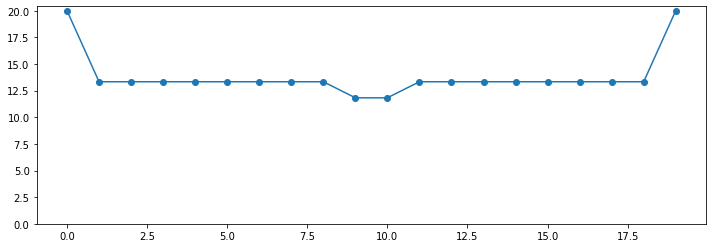

In [29]:
fig = plt.figure(figsize=(12, 4))
plt.plot([participation_ratio(vh[:,ind]) for ind in range(N)], 'o-')
plt.ylim(bottom=0)

### Put in a defect spring:  k --> k’ on one bond.
E.g., between masses j=1 and j=2.  Matrix is now:

Diagonalize it.

In [30]:
N = 128
k = 1.3
kp = 3.0

m = np.zeros((N, N))

# TRY: Rewrite this double loop as three single loops.
for ind in range(N):
    for jnd in range(N):
        # Set diagonal
        if ind == jnd:
            m[ind, jnd] = 2*k
        # Set off-diagonals.
        elif ind == (jnd + 1)%N:
            m[ind, jnd] = -k
        elif ind == (jnd -1)%N:
            m[ind, jnd] = -k
        else:
            pass

# Put the defect at about the one-third mark.
defect_ind = N//3 # Why use // for division here?

# For now, modify by hand.
# TRY: Write a function that introduces defects in a more flexible way.

m[defect_ind, defect_ind] = k + kp
m[defect_ind + 1, defect_ind + 1] = k + kp
m[defect_ind, defect_ind + 1] = -kp
m[defect_ind + 1, defect_ind] = -kp

#print(m)

In [31]:
# Degeneracy appears to be broken.
wh, vh = LA.eigh(m) # H is for Hermitian
#print(wh)

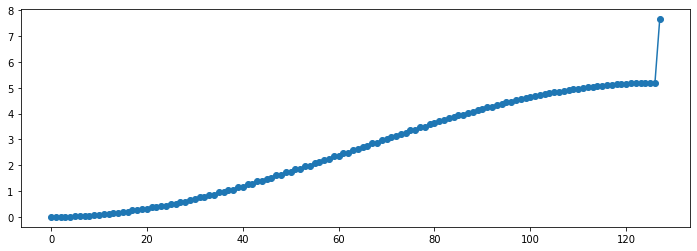

In [32]:
fig = plt.figure(figsize=(12, 4))
plt.plot(wh, 'o-')
#plt.hlines(5, 0, kp**2)
#plt.ylim(bottom=0)

### Plot squares of components, or compute P_n.
If k’>k you will find one localized mode.  If you plot eigenvalues, will see a
clump of closely spaced eigenvalues and a lonely eigenvalue
higher than the rest.  That’s the localized mode.  If k’<k I think
there is no localized mode.

(0.0, 134.2834313725491)

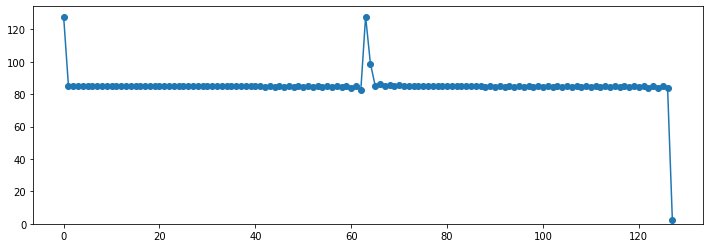

In [33]:
fig = plt.figure(figsize=(12, 4))
plt.plot([participation_ratio(vh[:,ind]) for ind in range(N)], 'o-')
plt.ylim(bottom=0)

### 



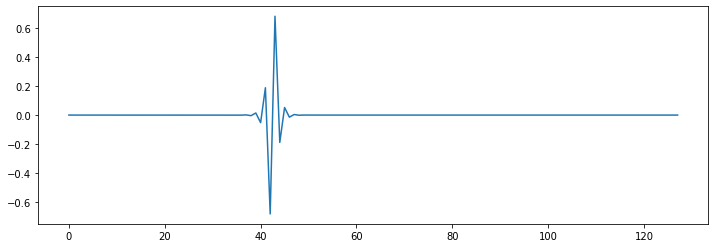

In [35]:
fig = plt.figure(figsize=(12, 4))
plt.plot(vh[:,-1])

### 



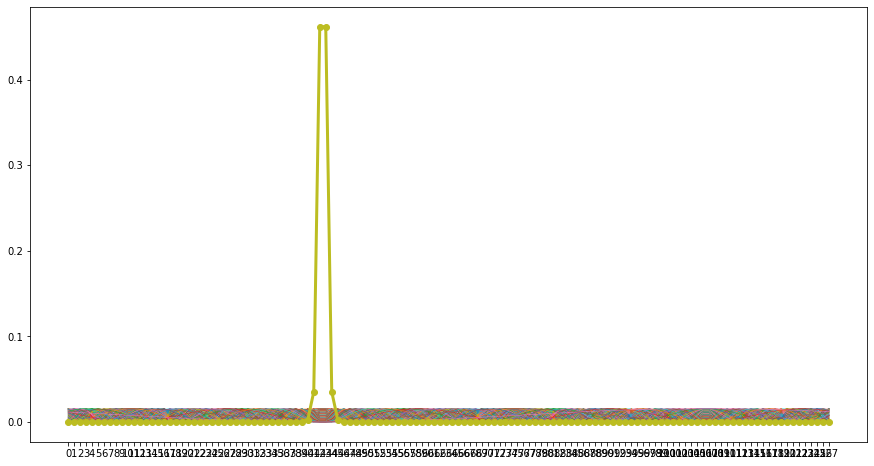

In [36]:
fig = plt.figure(figsize=(15, 8))
for ind in range(N):
    plt.plot(vh[:, ind]**2, '-', lw=0.5)
plt.xticks(range(N))
    
plt.plot(vh[:, -1]**2, 'o-', lw=3)

### Think about the relationship between localization and Heisenberg uncertainty.

RICHARD: What do you think?

If, e.g.,  $k=1.0$ and $kp=1.001$, the "localized mode" is pretty close to flat (same as the first eigenfunction).
If we increase $kp$ to 1.1, the localized mode is quite obvious - different from all other modes and the probability mass is high around the defect.

We might say that large differences between $k$ and $kp$ admit greater variances in their measurement.
This then corresponds to smaller variance in the expected position of the particle in the $N^{th}$ eigenfunction.

### Try alternating k, kp, k, kp..


In [37]:
N = 200
k = 1.0
kp = 2.1

m = np.zeros((N, N))

for ind in range(N):
    
    indp1 = (ind + 1) % N
    
    m[ind, ind] = k + kp
    if ind%2 == 0:
        m[indp1, ind] = -k
        m[ind, indp1] = -k
    else:
        m[indp1, ind] = -kp
        m[ind, indp1] = -kp
        
#print(m)

In [38]:
# Degeneracy appears to be broken.
wh, vh = LA.eigh(m) # H is for Hermitian
#print(wh)

### Eigenvalues separate into two groups ("bands")


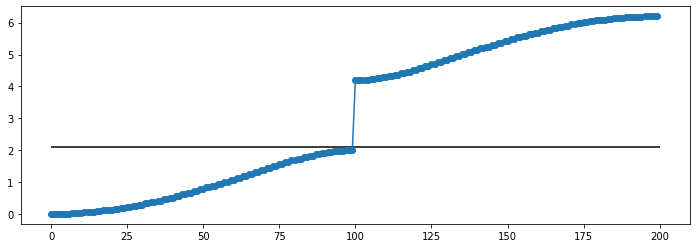

In [39]:
# RICHARD : input theory here for split values
split_val = k*kp #?????
fig = plt.figure(figsize=(12, 4))
plt.plot(wh, 'o-')
plt.hlines(split_val, 0, N)

### Histogram of eigenvalues.

Is there something more we might want to do here? 
Maybe comparing theory with numerics regarding these eigenvalue densities?

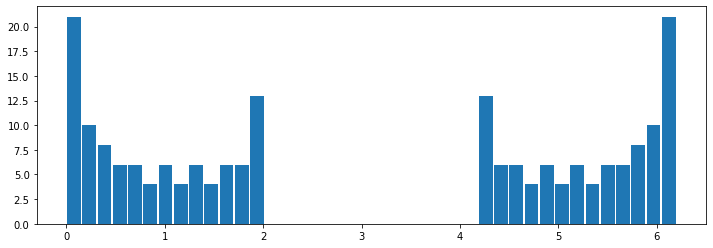

In [40]:
fig = plt.figure(figsize=(12, 4))
plt.hist(wh, bins=40, rwidth=0.9);

### Plot squares of components, or compute P_n.
If k’>k you will find one localized mode.  If you plot eigenvalues, will see a
clump of closely spaced eigenvalues and a lonely eigenvalue
higher than the rest.  That’s the localized mode.  If k’<k I think
there is no localized mode.

(0.0, 204.1129651904209)

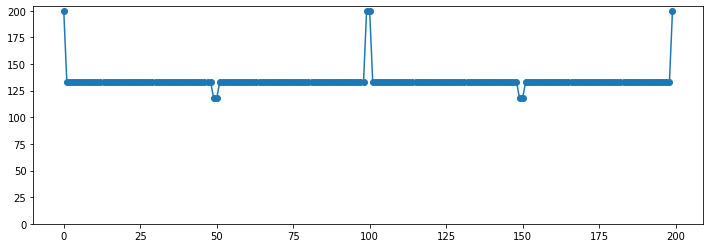

In [41]:
fig = plt.figure(figsize=(12, 4))
plt.plot([participation_ratio(vh[:,ind]) for ind in range(N)], 'o-')
plt.ylim(bottom=0)

### 



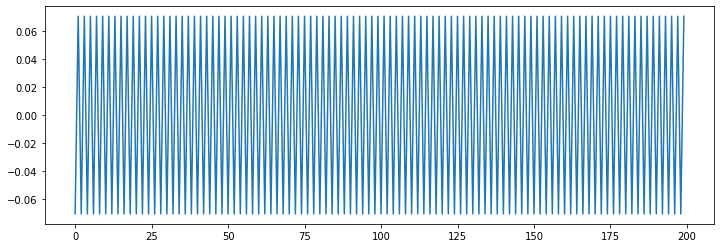

In [44]:
fig = plt.figure(figsize=(12, 4))
plt.plot(vh[:,-1])

### The eigenvectors divide into two qualitatively different groups.

Some discussion of phonons vs photons.
Sloshing vs vibrating.

Look at what masses are doing on either side of the strong spring.
For high frequency modes, these masses should be going 
RICHARD: This idea is from you - please feedback


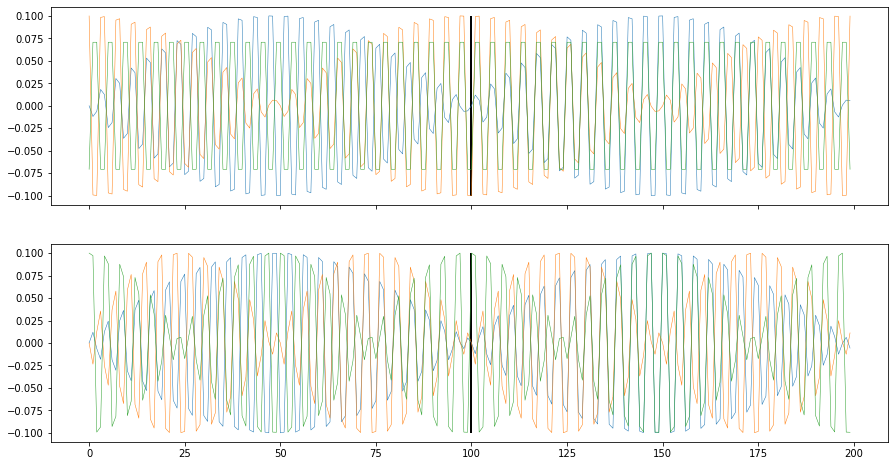

In [229]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15, 8), sharex=True)

# for ind in range(N//2):
for ind in [97, 98, 99]:
    ax[0].plot(vh[:, ind], '-', lw=0.5)
    ax[0].vlines(100, -0.1, 0.1)
# for ind in range(N//2, N):
for ind in [102, 103, 104]:
    ax[1].plot(vh[:, ind], '-', lw=0.5)
    ax[1].vlines(100, -0.1, 0.1)
    #plt.xticks(range(N))
    
#plt.plot(vh[:, N//2-3]**2, 'o-', lw=3)

(75.0, 125.0)

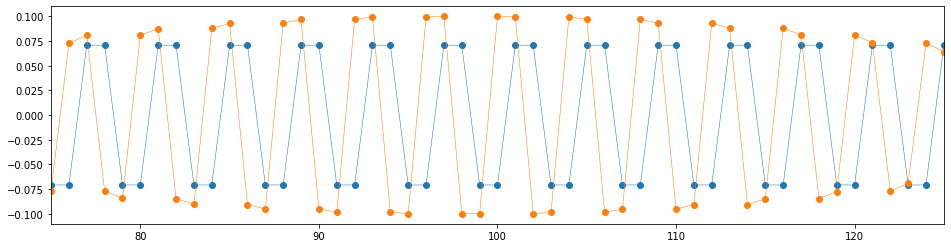

In [232]:
# Zoom in.
# Just left of the gap, masses connected by strong springs move together.
# Just right of the gap, masses connected by weak springs move together.
fig = plt.figure(figsize=(16, 4))
for ind in [N//2-1, N//2+1]:
    plt.plot(vh[:, ind], 'o-', lw=0.5)
plt.xlim(3*N/8, 5*N/8)

### Square lattice.

Repeat the above process for finding modes of a 2D square lattice.

Spend some time thinking about the matrix representation of this problem.
In the previous problem, the linear array of masses was represented by a linear array of numbers.
Here, the square array of masses will be thought of as both a 2D array of numbers and a 1D array of numbers.
The 1D array is obtained by "unraveling" the 2D array.
This 1D representation is what we will use when considering the eigenproblem.

In [45]:
# Check that we can understand what it means to go between square and linear representations.
N = 4
a = np.arange(N**2)
print(a)
a = a.reshape((N, N))
print(a)
a = a.ravel()
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [46]:
# N by N square array
# Connect each mass to its 4 neighbors NSEW
# Represent masses as *linear array (unwrap the square array)
# Implement periodic boundary conditions
# TODO : make PBC a toggle

N = 40
k = 1.1

spins = np.zeros((N, N))

spin_connections = np.zeros((N**2, N**2))

# connect to the East - moving to the right of spin "ind" you find spin (ind + 1)%N
for ind in range(N**2):
    jnd = (ind + 1)
    if jnd % N == 0:
        jnd -= N
    spin_connections[ind, jnd] = k # east
#     spin_connections[jnd, ind] = k # partner's west
    
    jnd = (ind + N) % (N**2)
    spin_connections[ind, jnd] = k # south
#     spin_connections[jnd, ind] = k # partner's north
    
spin_connections = spin_connections + spin_connections.T # Take care of west and north this way instead.
# print(spin_connections)

In [47]:
wh, vh = LA.eigh(spin_connections) # H is for Hermitian

# wh = LA.eigvalsh(spin_connections) # H is for Hermitian
# %timeit LA.eigvalsh(spin_connections) # H is for Hermitian

(1600, 1600)


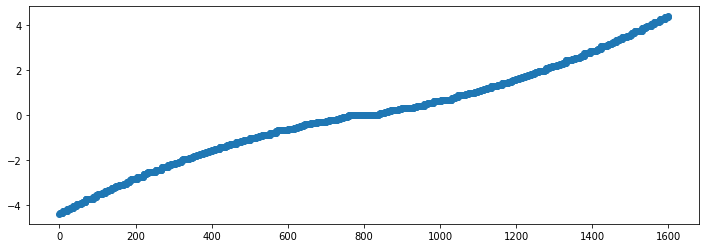

In [48]:
fig = plt.figure(figsize=(12, 4))
plt.plot(wh, 'o-')
print(spin_connections.shape)

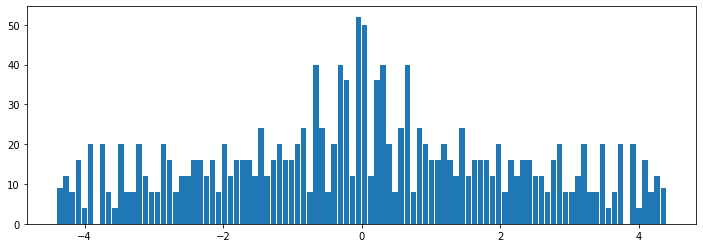

In [50]:
fig = plt.figure(figsize=(12, 4))
plt.hist(wh, bins=100, rwidth=0.9);

In [51]:
C = ss.csr_matrix(spin_connections)
# ss.linalg.eigsh(C, k=N**2 - 1, return_eigenvectors=False) # Can't compute all N**2 for some reason.

NameError: name 'ss' is not defined

In [56]:
# Add defect
# Connect each mass to its 4 neighbors NSEW
# Represent masses as *linear array (unwrap the square array)
# Implement periodic boundary conditions
# TODO : make PBC a toggle

N = 10
k = 1.1

spins = np.zeros((N, N))

spin_connections = np.zeros((N**2, N**2))

# connect to the East - moving to the right of spin "ind" you find spin (ind + 1)%N
for ind in range(N**2):
    jnd = (ind + 1)
    if jnd % N == 0:
        jnd -= N
    spin_connections[ind, jnd] = k # east
#     spin_connections[jnd, ind] = k # partner's west
    
    jnd = (ind + N) % (N**2)
    spin_connections[ind, jnd] = k # south
#     spin_connections[jnd, ind] = k # partner's north
    
spin_connections = spin_connections + spin_connections.T # Take care of west and north this way instead.

# Add a "spring" defect
d_xind = N//3
d_yind = N//4
d_ind = d_yind + N * d_xind
spin_connections[d_ind, d_ind + 1] += 5*k
spin_connections[d_ind + 1, d_ind] += 5*k

In [57]:
wh, vh = LA.eigh(spin_connections) # H is for Hermitian

(100, 100)


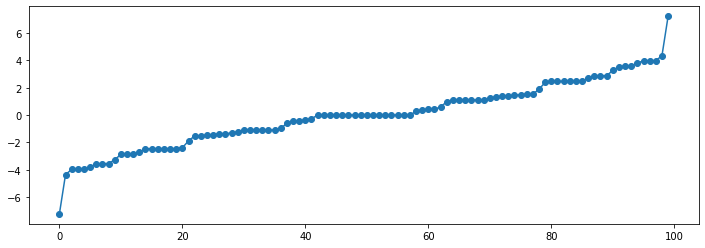

In [58]:
fig = plt.figure(figsize=(12, 4))
plt.plot(wh, 'o-')
print(spin_connections.shape)

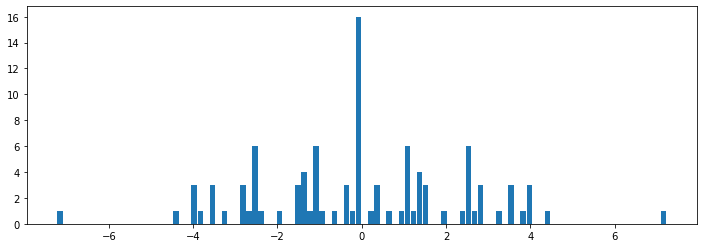

In [59]:
fig = plt.figure(figsize=(12, 4))
plt.hist(wh, bins=100, rwidth=0.9);

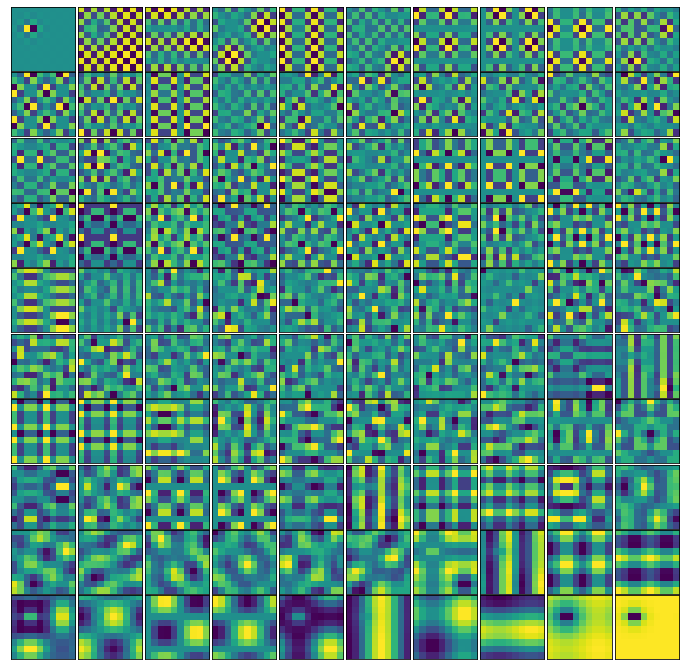

In [60]:
# Look at all of the eigenfunctions.
# Notice the impact of the defect.
fig, ax = plt.subplots(nrows=N, ncols=N, figsize=(12, 12))

for count in range(N**2):
    ind, jnd = divmod(count, N)
    ax[ind, jnd].imshow(vh[:, count].reshape(N, N))
    ax[ind, jnd].set_xticks([])
    ax[ind, jnd].set_yticks([])
    
plt.subplots_adjust(wspace=0.02, hspace=0.02)

# Honeycomb

Different ways to index.
..

Pay attention to the idea that the "last row" (or col) is not *connected* to the first, but rather it is *identified* with the first.

array([[-0.43014948,  1.67504306,  1.19119101],
       [ 2.21911511,  0.07875136, -0.44855805]])

### CHALLENGE:
Investigate the alternating mass-spring system (k, kp, k, kp..) and introduce a defect that yields a defect eigenvalue in the gap/

# QUIZ YOURSELF

- The dynamics of the system are contained in some matrix. What do the eigenvalues and eigenvectors of this matrix correspond to? 
- We have used **linear** algebra to analyze this system. What about the physical behavior is **linear**?
- CHALLENGE: Can you argue why there are no localized modes without a defect?


### Investigate different kinds of boundary conditions in 2D
- PBC in one dimension but not the other - cylinder vs Mobius
- torus vs Klein bottle vs ..?
- running brick
- honeycomb seems to have several different options - different ways to create and connect cells - some might induce twist
